In [1]:
import pandas as pd
import numpy as np
import ast
from IPython.display import Image

pd.set_option("display.max_columns", None)

# Data Wrangling and Creation of Final Dataframe for EDA

Using the preliminary csv file with household-level, vehicle, weather, and person-level data, we perform further cleaning and merge with dataset containing Places.

In [2]:
temp_df = pd.read_csv("merged_weather_VEH_1.csv", low_memory=False, index_col=False) # set low memory to false due to uncertain datatypes

In [3]:
temp_df

,Unnamed: 0.1,TDATE,ID,RELAT,GEND,AGE,HISP,NTVTY,LIC,USER,TRANS,FLEX,EMPLY,WKSTAT,JOBS,WLOC,WZIP,WDAYS,HOURS,WSCHED,COMPR,WMODE,INDUS,OCCUP,DISAB,TTRIP,TRNSUB,WTRIP,BTRIP,STUDE,SCHOL,SCITY,SSTAT,SZIP,SXCORD,SYCORD,SMODE,EDUCA,PTRIPS,TOLLF,HOVL,NOGOWHY,Moto_trip,Merged_RACE,Merged_TPTYP,Merged_CLIP,Merged_WXST,Merged_WDAY,Merged_DTYPE,Merged_SXST,Merged_TOLLR,Merged_TOLLB,INCEN,ILANG,AREA,STRATA,GTYPE,HHVEH,HHBIC,VEHNEW,RESTY,OWN,INCOM,HHSIZ,HHEMP,HHSTU,HHLIC,RECDate,DOW,HTRIPS,HCITY,HSTAT,HZIP,VEHOP,HPFlag,HCTRACT,HPrimaryCity,HHWGT,EXPHHWGT,Merged_BUYER,Merged_HHNOV,Merged_LDPER,simplified city,day_name,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),daylight_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),Unnamed: 0,Year of vehicle,Vehicle body type,Primary fuel type,Vehicle acquired,Vehicle ownership type,Vehicle transmission type,Vehicle drive type,Vehicle cylinder count,Vehicle type,was vehicle used on travel day,reason why not
0,0,2012-02-01,1138101_2,9.0,1.0,61.0,2.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,5.0,2.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan]","[nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[4.0, 3.0, 5.0, 6.0, nan, nan, nan]","[nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1,1,12,22,2,1,0,2,4,2,2,2,0,0,1,2012-01-18,3,2,BAKERSFIELD,CA,93301,1.0,2,600,BAKERSFIELD,2.120607,621.382358,"[nan, nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan]",Central California,Wednesday,3.0,15.9,4.3,10.1,8.2,37358.36,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2012-02-01,1120264_1,1.0,1.0,51.0,9.0,1.0,1.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,94534,5.0,48.0,2.0,1.0,5.0,48.0,11.0,2.0,0.0,NaN,5.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,3.0,2.0,NaN,1.0,"[99.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan]","[nan, nan]","[8.0, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",2,1,34,24,2,4,3,1,1,1,8,3,2,0,3,2012-01-16,3,7,PATTERSON,CA,95363,4.0,2,3202,PATTERSON,1.118909,327.863895,"[2.0, 1.0, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan]","[1.0, nan, nan, nan, nan, nan, nan, nan]",Central California,Wednesday,3.0,15.9,4.3,10.1,8.2,37358.36,0.0,0.0,0.0,0.0,440.0,2009.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,NaN
2,2,2012-02-01,1120264_2,2.0,2.0,51.0,9.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,2.0,3.0,95376,4.0,30.0,3.0,2.0,5.0,62.0,29.0,2.0,0.0,NaN,7.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,3.0,2.0,NaN,1.0,"[99.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan]","[nan, nan]","[98.0, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",2,1,34,24,2,4,3,1,1,1,8,3,2,0,3,2012-01-16,3,7,PATTERSON,CA,95363,4.0,2,3202,PATTERSON,1.118909,327.863895,"[2.0, 1.0, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan]","[1.0, nan, nan, nan, nan, nan, nan, nan]",Central California,Wednesday,3.0,15.9,4.3,10.1,8.2,37358.36,0.0,0.0,0.0,0.0,441.0,2004.0,5.0,1.0,1.0,1.0,1.0,2.0,4.0,2.0,1.0,NaN
3,3,2012-02-01,1120264_3,3.0,1.0,26.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,98.0,2.0,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,NaN,NaN,12.0,2.0,"[99.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan]","[nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan

The dataset "merged_weather" that we are working with at this stage is too large and contains unneccessary columns. Let's first further simplify the dataframe by removing the following columns. These columns do not all provide meaningful data and to further simplify and clean the data, the following processing decisions were made:
- Columns were dropped if they were deemed irrelevant, redundant, or had severe class imbalance that would introduce significant bias or variance errors
- Columns with information that would result in data leakage. For example, columns with information regarding why a vehicle was not used for a trip results in the model automatically inferring that a vehicle was not used, thus revealing outcomes directly. This gives the model an unfair advantage and is not information that is not available during prediction.

In [4]:
columns = ['AREA',
          'USER',
          'COMPR',
          'DOW',
          'HCTRACT',
          'HSTAT',
          'ILANG',
          'HPFlag',
          'VEHNEW',
          'Merged_DTYPE',
          'Merged_BUYER',
          'Merged_CLIP',
          'Merged_HHNOV',
          'Merged_LDPER',
          'Merged_SXST',
          'Merged_TOLLB',
          'Merged_TOLLR',
          'Merged_TPTYP',
          'Merged_WXST',
          'RECDate',
          'RELAT',
          'SSTAT',
          'SXCORD',
          'SYCORD',
          'Unnamed: 0',
          'Unnamed: 0.1',
          'Vehicle drive type',
          'day_name',
          'simplified city',
          'NOGOWHY',
          'reason why not',
          'HHWGT',
          'EXPHHWGT',
          'was vehicle used on travel day',
          'TOLLF',
          'WZIP',
          'SZIP',
          ]

In [5]:
temp_df.drop(columns=columns, inplace=True)
temp_df.head()

,TDATE,ID,GEND,AGE,HISP,NTVTY,LIC,TRANS,FLEX,EMPLY,WKSTAT,JOBS,WLOC,WDAYS,HOURS,WSCHED,WMODE,INDUS,OCCUP,DISAB,TTRIP,TRNSUB,WTRIP,BTRIP,STUDE,SCHOL,SCITY,SMODE,EDUCA,PTRIPS,HOVL,Moto_trip,Merged_RACE,Merged_WDAY,INCEN,STRATA,GTYPE,HHVEH,HHBIC,RESTY,OWN,INCOM,HHSIZ,HHEMP,HHSTU,HHLIC,HTRIPS,HCITY,HZIP,VEHOP,HPrimaryCity,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),daylight_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),Year of vehicle,Vehicle body type,Primary fuel type,Vehicle acquired,Vehicle ownership type,Vehicle transmission type,Vehicle cylinder count,Vehicle type
0,2012-02-01,1138101_2,1.0,61.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN,3.0,NaN,NaN,NaN,1.0,0.0,NaN,2.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,22,2,1,0,4,2,2,2,0,0,1,2,BAKERSFIELD,93301,1.0,BAKERSFIELD,3.0,15.9,4.3,10.1,8.2,37358.36,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-02-01,1120264_1,1.0,51.0,9.0,1.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,5.0,48.0,2.0,5.0,48.0,11.0,2.0,0.0,NaN,5.0,0.0,3.0,NaN,NaN,NaN,4.0,5.0,2.0,1.0,"[99.0, nan, nan, nan]","[8.0, nan, nan, nan, nan, nan, nan]",2,24,2,4,3,1,1,8,3,2,0,3,7,PATTERSON,95363,4.0,PATTERSON,3.0,15.9,4.3,10.1,8.2,37358.36,0.0,0.0,0.0,0.0,2009.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
2,2012-02-01,1120264_2,2.0,51.0,9.0,1.0,1.0,2.0,2.0,1.0,NaN,2.0,3.0,4.0,30.0,3.0,5.0,62.0,29.0,2.0,0.0,NaN,7.0,1.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,"[99.0, nan, nan, nan]","[98.0, nan, nan, nan, nan, nan, nan]",2,24,2,4,3,1,1,8,3,2,0,3,7,PATTERSON,95363,4.0,PATTERSON,3.0,15.9,4.3,10.1,8.2,37358.36,0.0,0.0,0.0,0.0,2004.0,5.0,1.0,1.0,1.0,1.0,4.0,2.0
3,2012-02-01,1120264_3,1.0,26.0,2.0,1.0,1.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,98.0,2.0,3.0,2.0,3.0,NaN,NaN,NaN,5.0,0.0,NaN,2.0,"[99.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",2,24,2,4,3,1,1,8,3,2,0,3,7,PATTERSON,95363,4.0,PATTERSON,3.0,15.9,4.3,10.1,8.2,37358.36,0.0,0.0,0.0,0.0,2004.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
4,2012-02-01,1120296_1,2.0,58.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,5.0,NaN,3.0,NaN,NaN,NaN,3.0,6.0,NaN,2.0,"[97.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,23,2,0,0,6,2,1,1,0,0,0,6,WATSONVILLE,95076,NaN,WATSONVILLE,51.0,13.1,6.0,9.1,7.5,37228.98,0.2,0.2,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_to_merge = pd.read_csv('cleaned_places_df.csv', low_memory=False).set_index("hh_person_id")

In [7]:
df_to_merge

,Total number of people traveling on trip,Number of household members on trip,Mode of transport,Assigned travel day,Duration of trip,Duration of activity,Zip code,Trip distance,Straight-line distance between origin and destination,Time of arrival,Time of departure,city_from_zip
hh_person_id,,,,,,,,,,,,
1031985_1,2.0,0.0,6.0,1.0,22.0,231,94510,13.428271,7.647539,09:02,12:53,San Francisco Bay Area
1031985_1,2.0,0.0,6.0,NaN,20.0,826,94591,12.975526,7.647539,13:13,02:59,San Francisco Bay Area
1031985_2,1.0,0.0,5.0,1.0,10.0,77,94589,5.125961,3.411647,09:26,10:43,San Francisco Bay Area
1031985_2,1.0,0.0,5.0,NaN,13.0,963,94591,5.126981,3.411647,10:56,02:59,San Francisco Bay Area
1032036_1,3.0,2.0,5.0,1.0,20.0,415,92128,3.619057,2.740749,08:35,15:30,Greater Los Angeles Area
...,...,...,...,...,...,...,...,...,...,...,...,...
7211560_4,2.0,1.0,6.0,1.0,45.0,286,95117,12.978730,9.297521,08:09,12:55,San Francisco Bay Area
7211560_4,2.0,1.0,6.0,1.0,8.0,23,95117,2.240663,1.468173,13:03,13:26,San Francisco Bay Area
7211560_4,2.0,1.0,6.0,NaN,18.0,795,95148,12.284206,8.791944,13:44,02:59,San Francisco Bay Area


In [8]:
# Compare the sizes of the DataFrames
print(f"Number of rows in df_to_merge: {df_to_merge.shape[0]}")
print(f"Number of rows in temp_df: {temp_df.shape[0]}")

# Check for unique IDs in temp_df to ensure they match df_to_merge index
print(f"Number of unique IDs in df_to_merge: {df_to_merge.index.nunique()}")
print(f"Number of unique IDs in temp_df: {temp_df['ID'].nunique()}")

Number of rows in df_to_merge: 290067
Number of rows in temp_df: 109113
Number of unique IDs in df_to_merge: 69399
Number of unique IDs in temp_df: 109113


In [9]:
def final_merge(temp_df, df_to_merge):
     # Step 1: Set "ID" as the index for temp_df
     temp_df = temp_df.set_index('ID')

     # Step 2: Filter df_to_merge to keep only rows corresponding to IDs in filtered_df
     temp_df_filtered = temp_df[temp_df.index.isin(df_to_merge.index.get_level_values('hh_person_id'))]

     # Step 3: Map individual-level data to trip-level data
     expanded_individual_df = df_to_merge.index.to_series().map(temp_df_filtered.to_dict('index'))

     # Step 4: Convert the resulting Series of dictionaries into a DataFrame
     expanded_individual_df = pd.DataFrame(list(expanded_individual_df))

     # Step 5: Align the index with filtered_df
     expanded_individual_df.index = df_to_merge.index

     # Step 6: Combine trip-level data with expanded individual-level data
     final_df = pd.concat([df_to_merge, expanded_individual_df], axis=1)

     # Step 7: Filter final_df to include only rows with a recorded trip in 'Trip distance'
     final_df = final_df[final_df['Trip distance'].notnull()]
     return final_df

In [10]:
final_df = final_merge(temp_df,df_to_merge)
# Verify the updated shape and data after filtering
print(f"Final DataFrame shape after filtering for recorded trips: {final_df.shape}")
final_df.head()

Final DataFrame shape after filtering for recorded trips: (290067, 80)


,Total number of people traveling on trip,Number of household members on trip,Mode of transport,Assigned travel day,Duration of trip,Duration of activity,Zip code,Trip distance,Straight-line distance between origin and destination,Time of arrival,Time of departure,city_from_zip,TDATE,GEND,AGE,HISP,NTVTY,LIC,TRANS,FLEX,EMPLY,WKSTAT,JOBS,WLOC,WDAYS,HOURS,WSCHED,WMODE,INDUS,OCCUP,DISAB,TTRIP,TRNSUB,WTRIP,BTRIP,STUDE,SCHOL,SCITY,SMODE,EDUCA,PTRIPS,HOVL,Moto_trip,Merged_RACE,Merged_WDAY,INCEN,STRATA,GTYPE,HHVEH,HHBIC,RESTY,OWN,INCOM,HHSIZ,HHEMP,HHSTU,HHLIC,HTRIPS,HCITY,HZIP,VEHOP,HPrimaryCity,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),daylight_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),Year of vehicle,Vehicle body type,Primary fuel type,Vehicle acquired,Vehicle ownership type,Vehicle transmission type,Vehicle cylinder count,Vehicle type
hh_person_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1031985_1,2.0,0.0,6.0,1.0,22.0,231,94510,13.428271,7.647539,09:02,12:53,San Francisco Bay Area,2012-05-01,1.0,74.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,2006.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0
1031985_1,2.0,0.0,6.0,NaN,20.0,826,94591,12.975526,7.647539,13:13,02:59,San Francisco Bay Area,2012-05-01,1.0,74.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,2006.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0
1031985_2,1.0,0.0,5.0,1.0,10.0,77,94589,5.125961,3.411647,09:26,10:43,San Francisco Bay Area,2012-05-01,2.0,73.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,1987.0,5.0,1.0,2.0,1.0,NaN,NaN,2.0
1031985_2,1.0,0.0,5.0,NaN,13.0,963,94591,5.126981,3.411647,10:56,02:59,San Francisco Bay Area,2012-05-01,2.0,73.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,1987.0,5.0,1.0,2.0,1.0,NaN,NaN,2.0
1032036_1,3.0,2.0,5.0,1.0,20.0,415,92128,3.619057,2.740749,08:35,15:30,Greater Los Angeles Area,2012-05-12,1.0,46.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,5.0,40.0,2.0,2.0,54.0,15.0,2.0,0.0,NaN,5.0,2.0,3.0,NaN,NaN,NaN,6.0,5.0,1.0,1.0,"[1.0, nan, nan, nan]","[8.0, nan, nan, nan, nan, nan, nan]",1,14,1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,92127,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,2007.0,8.0,1.0,1.0,1.0,1.0,4.0,2.0


In [11]:
columns = ['Assigned travel day',
          'Duration of activity',
          'Zip code',
          'HISP',
          'HZIP',
          'GTYPE',
          'STRATA'
          ]

In [12]:
final_df

,Total number of people traveling on trip,Number of household members on trip,Mode of transport,Assigned travel day,Duration of trip,Duration of activity,Zip code,Trip distance,Straight-line distance between origin and destination,Time of arrival,Time of departure,city_from_zip,TDATE,GEND,AGE,HISP,NTVTY,LIC,TRANS,FLEX,EMPLY,WKSTAT,JOBS,WLOC,WDAYS,HOURS,WSCHED,WMODE,INDUS,OCCUP,DISAB,TTRIP,TRNSUB,WTRIP,BTRIP,STUDE,SCHOL,SCITY,SMODE,EDUCA,PTRIPS,HOVL,Moto_trip,Merged_RACE,Merged_WDAY,INCEN,STRATA,GTYPE,HHVEH,HHBIC,RESTY,OWN,INCOM,HHSIZ,HHEMP,HHSTU,HHLIC,HTRIPS,HCITY,HZIP,VEHOP,HPrimaryCity,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),daylight_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),Year of vehicle,Vehicle body type,Primary fuel type,Vehicle acquired,Vehicle ownership type,Vehicle transmission type,Vehicle cylinder count,Vehicle type
hh_person_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1031985_1,2.0,0.0,6.0,1.0,22.0,231,94510,13.428271,7.647539,09:02,12:53,San Francisco Bay Area,2012-05-01,1.0,74.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,2006.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0
1031985_1,2.0,0.0,6.0,NaN,20.0,826,94591,12.975526,7.647539,13:13,02:59,San Francisco Bay Area,2012-05-01,1.0,74.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,2006.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0
1031985_2,1.0,0.0,5.0,1.0,10.0,77,94589,5.125961,3.411647,09:26,10:43,San Francisco Bay Area,2012-05-01,2.0,73.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,1987.0,5.0,1.0,2.0,1.0,NaN,NaN,2.0
1031985_2,1.0,0.0,5.0,NaN,13.0,963,94591,5.126981,3.411647,10:56,02:59,San Francisco Bay Area,2012-05-01,2.0,73.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,1987.0,5.0,1.0,2.0,1.0,NaN,NaN,2.0
1032036_1,3.0,2.0,5.0,1.0,20.0,415,92128,3.619057,2.740749,08:35,15:30,Greater Los Angeles Area,2012-05-12,1.0,46.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,5.0,40.0,2.0,2.0,54.0,15.0,2.0,0.0,NaN,5.0,2.0,3.0,NaN,NaN,NaN,6.0,5.0,1.0,1.0,"[1.0, nan, nan, nan]","[8.0, nan, nan, nan, nan, nan, nan]",1,14,1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,92127,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,2007.0,8.0,1.0,1.0,1.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211560_4,2.0,1.0,6.0,1.0,45.0,286,95117,12.978730,9.297521,08:09,12:55,San Francisco Bay Area,2013-01-30,1.0,12.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,6.0,3.0,1.0,3.0,SAN JOSE,6.0,1.0,3.0,2.0,1.0,"[1.0, 3.0, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,13,1,1,3,3,1,6,4,1,2,2,22,SAN JOSE,95148,1.0,SAN JOSE,0.0,16.7,3.8,10.2,8.5,37078.10,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7211560_4,2.0,1.0,6.0,1.0,8.0,23,95117,2.240663,1.4681

In [13]:
final_df.drop(columns=columns, inplace=True)

In [14]:
# Calculate the number of trips per agent
trips_per_agent = final_df.groupby('hh_person_id').size()

# Calculate the average number of trips
average_trips_per_agent = trips_per_agent.mean()

print(f"Average number of trips per agent: {average_trips_per_agent:.2f}")

Average number of trips per agent: 4.18


In [15]:
def get_missing_value_summary(df, threshold=10):
    """
    Returns a DataFrame summarizing columns with a missing value percentage above the specified threshold.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        threshold (float): The minimum percentage of missing values to include a column (default is 10%).
    
    Returns:
        pd.DataFrame: A DataFrame with columns for column names and their missing value percentages.
    """
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean() * 100
    
    # Filter columns that have missing values above the threshold
    columns_above_threshold = missing_percentage[missing_percentage > threshold]
    
    # Create a DataFrame summarizing the results
    summary_df = pd.DataFrame({
        'Column': columns_above_threshold.index,
        'Missing Percentage': columns_above_threshold.values
    }).sort_values(by='Missing Percentage', ascending=False)
    
    return summary_df

In [16]:
columns = final_df.columns

# Convert column names to a DataFrame
columns_df = pd.DataFrame(columns, columns=["Column Names"])

# Export to a CSV file. We will use this file to update the naming of the columns within the dataframe manually, as it is easier to do so using Excel.
columns_df.to_csv("Columns_output.csv", index=False)

In [17]:
# Remapping of the column names based on the modified csv. 
columns_organized = pd.read_csv("Columns_organized.csv")
remapping = dict(zip(columns_organized["Column Names"], columns_organized["Remapping"]))
final_df.rename(columns=remapping, inplace=True)

The following IMG defines the variables according to the lookup table from California Statewide Travel Survey (CSTS).

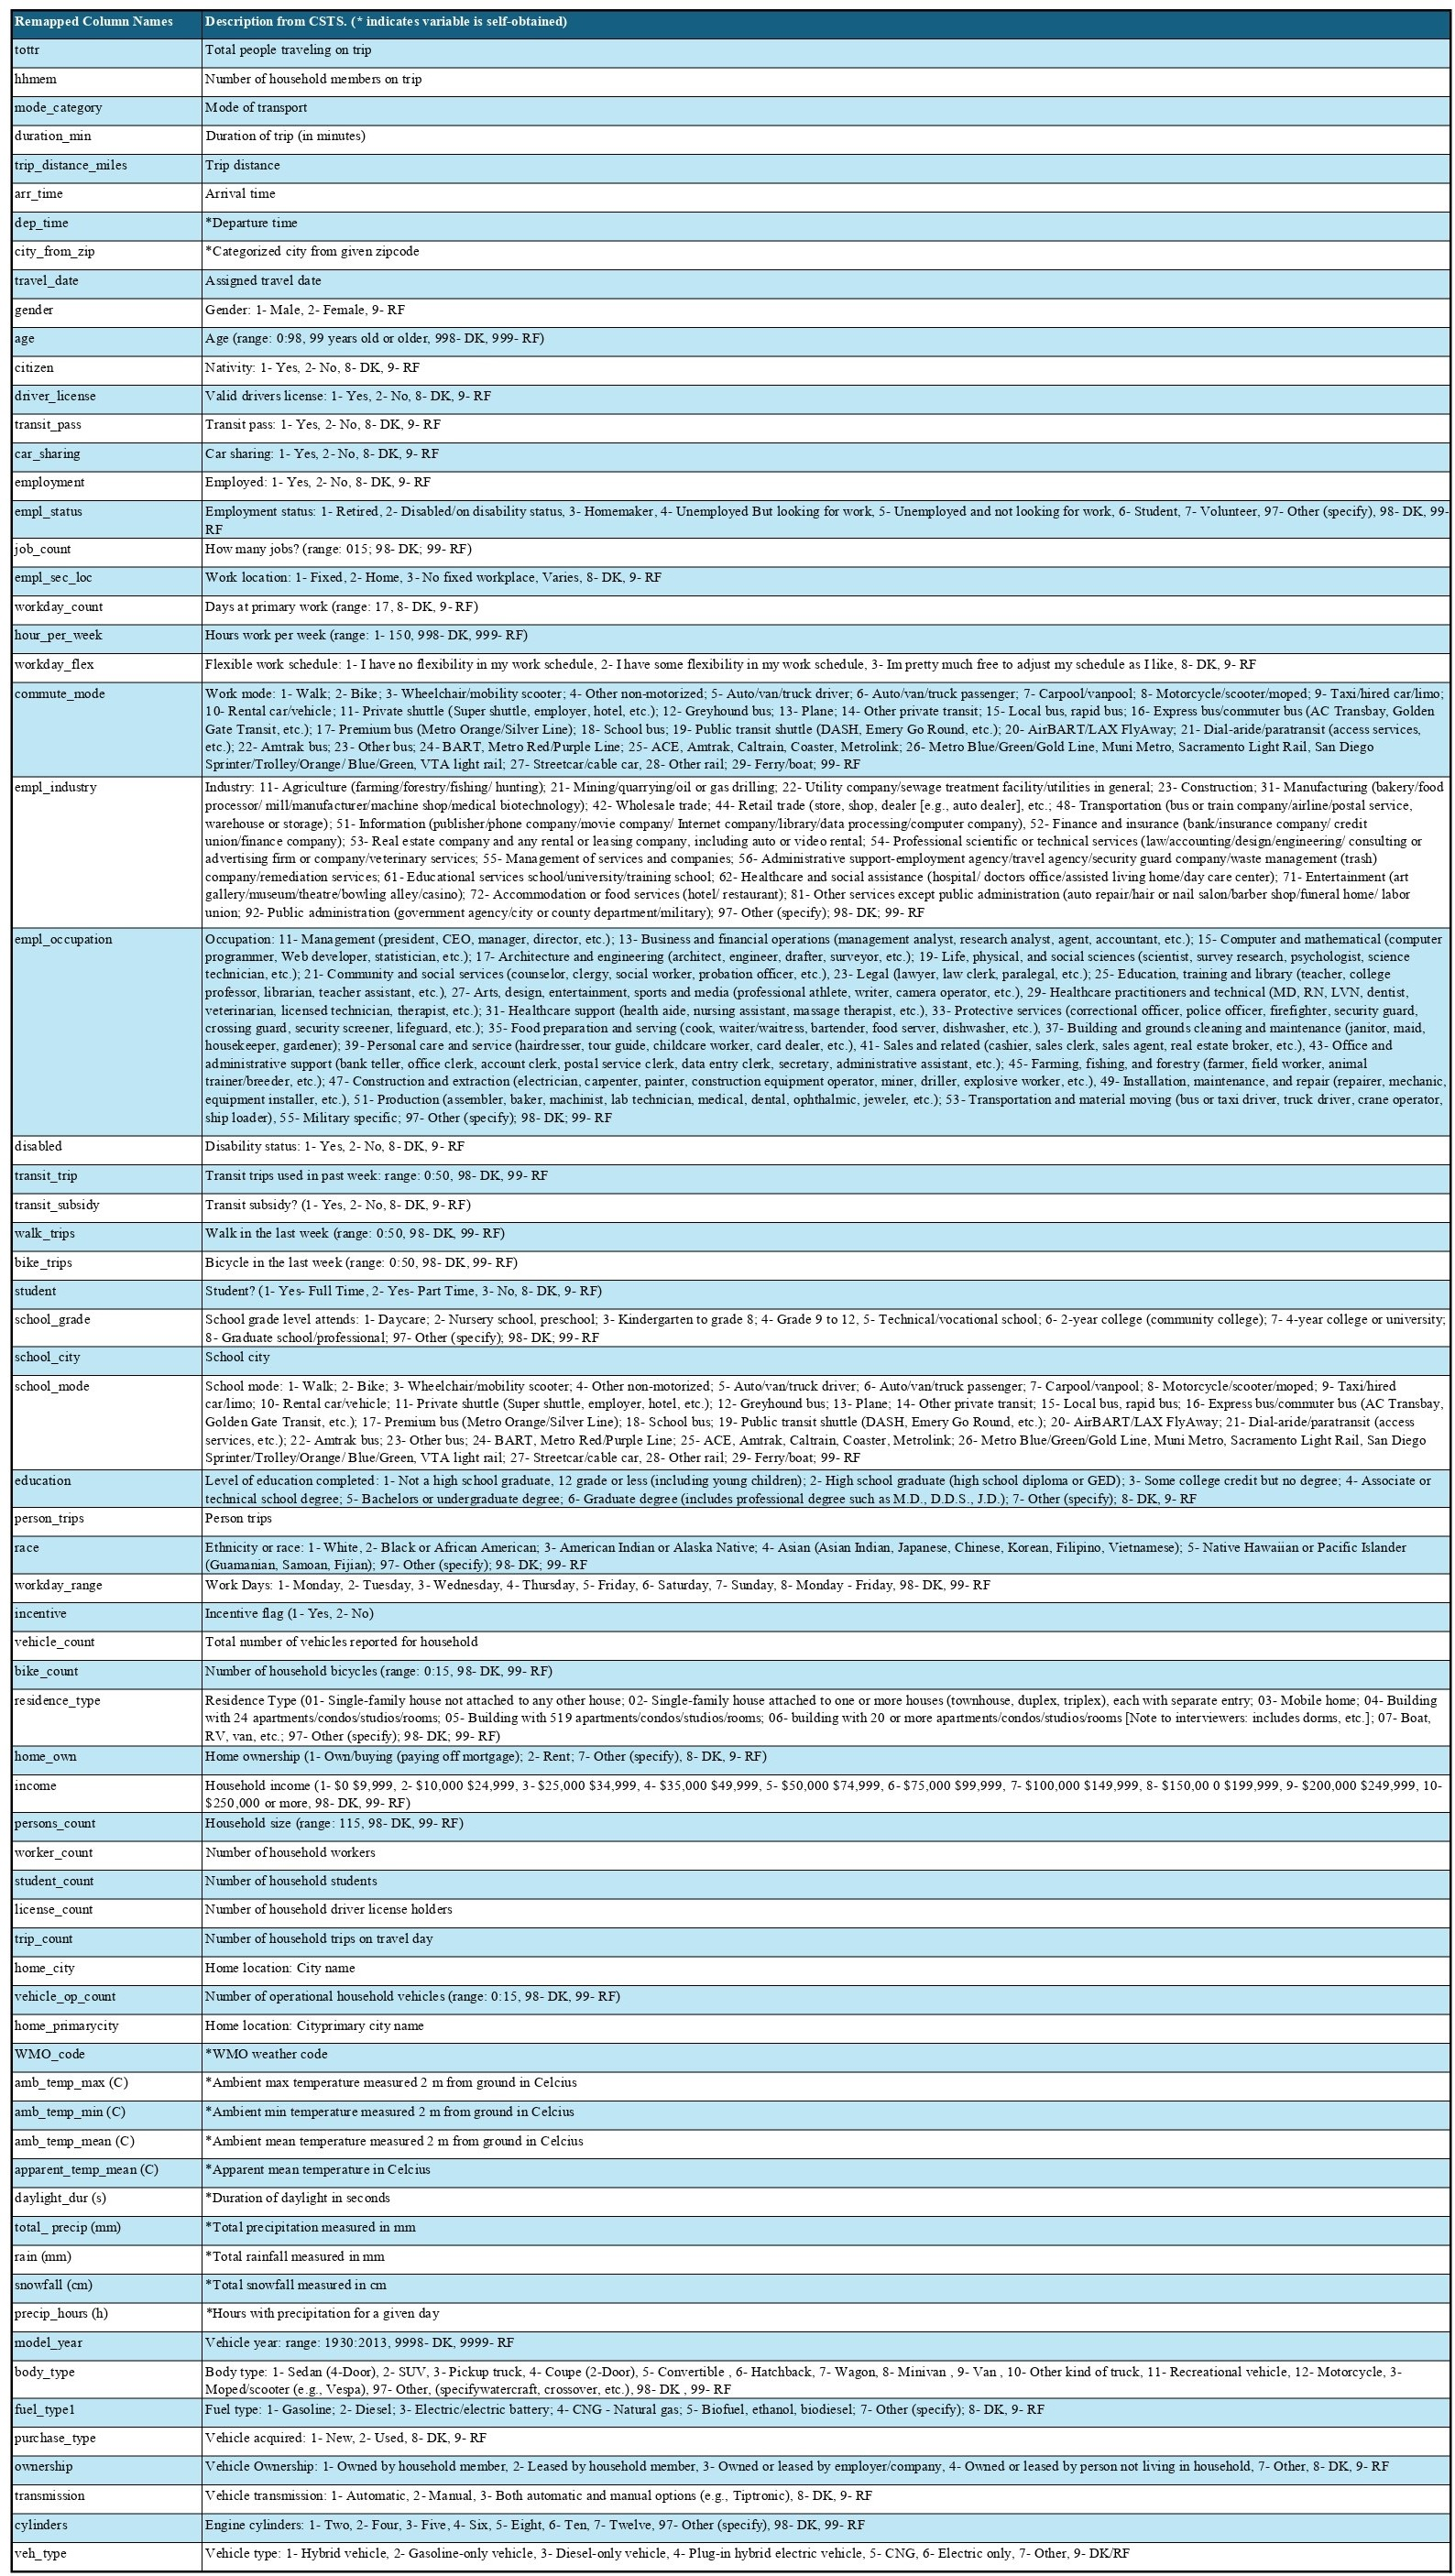

In [18]:
# Display an image from a file
Image("Column Descriptions.jpg")

The dep_time column represents the departure time according to the survey diaries from the person and may not be accurate. Modify the "dep_time" column and set it equal to arr_time - duration_min as this will give us clear information about the trip.

In [19]:
# Function to normalize time values
def normalize_time(time_str):
    """
    Normalize time values to ensure they are valid.
    Converts times above 24:00 to the correct 0:00 format.
    """
    hours, minutes = map(int, time_str.split(':'))
    if hours >= 24:
        hours -= 24
    return f"{hours:02}:{minutes:02}"

final_df['arr_time'] = final_df['arr_time'].apply(normalize_time)
final_df["arr_time"] = pd.to_datetime(final_df['arr_time'], format='%H:%M')# Set the arrival time to datetime and only keep the hour.

In [20]:
from datetime import timedelta

# Subtract duration_min from arr_time
final_df['dep_time'] = final_df.apply(lambda row: row['arr_time'] - timedelta(minutes=row['duration_min']), axis=1).dt.time
final_df["arr_time"] = final_df["arr_time"].dt.time

# Convert the travel_date to datetime object.
final_df["travel_date"] = pd.to_datetime(final_df["travel_date"])

# Check to see if the time data has been modified correctly
final_df

,tottr,hhmem,mode_category,duration_min,trip_distance_miles,air_trip_distance_miles,arr_time,dep_time,city_from_zip,travel_date,gender,age,citizen,driver_license,transit_pass,car_sharing,employment,empl_status,job_count,empl_sec_loc,workday_count,hour_per_week,workday_flex,commute_mode,empl_industry,empl_occupation,disabled,transit_trip,transit_subsidy,walk_trips,bike_trips,student,school_grade,school_city,school_mode,education,person_trips,HOVL,Moto_trip,race,workday_range,incentive,vehicle_count,bike_count,residence_type,home_own,income,persons_count,worker_count,student_count,license_count,trip_count,home_city,vehicle_op_count,home_primarycity,WMO_code,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),daylight_dur (s),total_ precip (mm),rain (mm),snowfall (cm),precip_hours (h),model_year,body_type,fuel_type1,purchase_type,ownership,transmission,cylinders,veh_type
hh_person_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1031985_1,2.0,0.0,6.0,22.0,13.428271,7.647539,09:02:00,08:40:00,San Francisco Bay Area,2012-05-01,1.0,74.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,2,2,1,1,3,2,0,0,2,4,VALLEJO,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,2006.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0
1031985_1,2.0,0.0,6.0,20.0,12.975526,7.647539,13:13:00,12:53:00,San Francisco Bay Area,2012-05-01,1.0,74.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,2,2,1,1,3,2,0,0,2,4,VALLEJO,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,2006.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0
1031985_2,1.0,0.0,5.0,10.0,5.125961,3.411647,09:26:00,09:16:00,San Francisco Bay Area,2012-05-01,2.0,73.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,2,2,1,1,3,2,0,0,2,4,VALLEJO,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,1987.0,5.0,1.0,2.0,1.0,NaN,NaN,2.0
1031985_2,1.0,0.0,5.0,13.0,5.126981,3.411647,10:56:00,10:43:00,San Francisco Bay Area,2012-05-01,2.0,73.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,2,2,1,1,3,2,0,0,2,4,VALLEJO,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,1987.0,5.0,1.0,2.0,1.0,NaN,NaN,2.0
1032036_1,3.0,2.0,5.0,20.0,3.619057,2.740749,08:35:00,08:15:00,Greater Los Angeles Area,2012-05-12,1.0,46.0,1.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,5.0,40.0,2.0,2.0,54.0,15.0,2.0,0.0,NaN,5.0,2.0,3.0,NaN,NaN,NaN,6.0,5.0,1.0,1.0,"[1.0, nan, nan, nan]","[8.0, nan, nan, nan, nan, nan, nan]",1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,2007.0,8.0,1.0,1.0,1.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211560_4,2.0,1.0,6.0,45.0,12.978730,9.297521,08:09:00,07:24:00,San Francisco Bay Area,2013-01-30,1.0,12.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,6.0,3.0,1.0,3.0,SAN JOSE,6.0,1.0,3.0,2.0,1.0,"[1.0, 3.0, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,1,3,3,1,6,4,1,2,2,22,SAN JOSE,1.0,SAN JOSE,0.0,16.7,3.8,10.2,8.5,37078.10,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7211560_4,2.0,1.0,6.0,8.0,2.240663,1.468173,13:03:00,12:55:00,San Francisco Bay Area,2013-01-30,1.0,12.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,6.0,3.0,1.0,3.0,SAN JOSE,6.0,1.0,3.0,2.0,1.0,"[1.0, 3.0, nan, nan]","[nan, nan, nan, nan, nan, nan

In [21]:
missing_summary_df = get_missing_value_summary(final_df, threshold=0)

# Display the DataFrame in the notebook
display(missing_summary_df)

,Column,Missing Percentage
20,school_mode,77.597245
19,school_city,77.595866
18,school_grade,75.994167
16,transit_subsidy,73.437171
7,empl_status,69.933498
13,commute_mode,54.191618
10,workday_count,45.900430
15,empl_occupation,45.900430
14,empl_industry,45.900430
12,workday_flex,45.900430


To handle missing values, delete rows with unknown or refused data from specified columns with reference to the variable definitions.

In [22]:
# Remove rows with missing travel dates.
final_df = final_df[~(final_df["travel_date"].isna())]

Modify race and workday_range columns as they are currently difficult to work with.

In [23]:
# Convert the string in the 'race' column to a list, replace 'nan' with None, and extract the first value
final_df.loc[:, 'race'] = final_df['race'].apply(
    lambda x: ast.literal_eval(x.replace('nan', 'None'))[0] if isinstance(x, str) else None
)

# First convert the units column into an actual list
final_df.loc[:, 'workday_range'] = final_df['workday_range'].str.strip("[]").str.replace("'", "").str.split(", ")

# Function to handle 'nan' and numbers in a string list
def convert_list_to_int_or_nan(x):
    if isinstance(x, str):
        # Convert string to list using ast.literal_eval
        x = ast.literal_eval(x)

    # Now process the list, convert numeric strings to int and 'nan' to np.nan
    result = []
    for val in x:
        if isinstance(val, str):
            # If it's a string number (e.g., '5.0', '6.0'), convert to float or int
            if val.lower() != 'nan':
                result.append(int(float(val)))  # Convert numeric string to an integer
            else:
                result.append(np.nan)  # Replace 'nan' string with np.nan
        elif isinstance(val, (float, int)):
            result.append(int(val))  # Convert numeric types to integer
        else:
            result.append(np.nan)  # Handle non-numeric values

    return result

# Apply this function to the 'workday_range' column
final_df.loc[:, 'workday_range'] = final_df['workday_range'].apply(convert_list_to_int_or_nan)
final_df = final_df[~final_df['workday_range'].apply(lambda x: any(item in [98, 99] for item in x))]


In [24]:
def remove_unknown_entries(df, filters):
    """
    Remove rows with "unknown/refused" values in specified columns or groups of columns.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - filters (list of tuples): Each tuple contains:
      - A list of column names.
      - A list of values to filter out from any of the columns in the list.

    Returns:
    - pd.DataFrame: A cleaned DataFrame with rows containing "unknown" values removed.
    """
    filtered_indexes = set()
    
    for cols, values in filters:
        # Iterate through each column in the list of columns
        for col in cols:
            # Identify rows with "unknown" values in the current column
            filtered_indexes.update(df[df[col].isin(values)].index)
    
    # Remove rows with the accumulated filtered indexes
    cleaned_df = df[~df.index.isin(filtered_indexes)]
    return cleaned_df

In [25]:
# Drop columns with values equal to 7
cols_1 = ["veh_type","home_own","education"]

# Drop columns with values equal to 8 and 9
cols_2 = ['gender', 'citizen','driver_license', 'transit_pass', 'car_sharing' , 'disabled', 'home_own', 
          'employment', 'empl_sec_loc', 'workday_count', 'workday_flex', 'transit_subsidy', 'student', 'education']

# Drop columns with values equal to 97
cols_3 = ['empl_industry', 'empl_occupation', 'school_grade', 'race', 'residence_type']

# Drop columns with values equal to 98 and 99
cols_4 = ['race', 'transit_trip' , 'workday_range' , 'residence_type' , 'persons_count', 'empl_status', 'job_count', 'commute_mode', 'empl_industry',
          'empl_occupation', 'walk_trips', 'bike_trips', 'school_grade', 'school_mode', 'bike_count', 'residence_type', 'income', 'trip_count']

# Drop columns with values equal to 998 and 999
cols_5 = ['hour_per_week', 'age']

# Remove rows with unknown entries.
filters = [
    (cols_1, [7]),
    (cols_2, [8, 9]),
    (cols_4, [97, 98, 99]),
    (cols_5, [998,999])
]

# Use the function to clean the DataFrame
cleaned_df = remove_unknown_entries(final_df, filters)
cleaned_df.head()

,tottr,hhmem,mode_category,duration_min,trip_distance_miles,air_trip_distance_miles,arr_time,dep_time,city_from_zip,travel_date,gender,age,citizen,driver_license,transit_pass,car_sharing,employment,empl_status,job_count,empl_sec_loc,workday_count,hour_per_week,workday_flex,commute_mode,empl_industry,empl_occupation,disabled,transit_trip,transit_subsidy,walk_trips,bike_trips,student,school_grade,school_city,school_mode,education,person_trips,HOVL,Moto_trip,race,workday_range,incentive,vehicle_count,bike_count,residence_type,home_own,income,persons_count,worker_count,student_count,license_count,trip_count,home_city,vehicle_op_count,home_primarycity,WMO_code,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),daylight_dur (s),total_ precip (mm),rain (mm),snowfall (cm),precip_hours (h),model_year,body_type,fuel_type1,purchase_type,ownership,transmission,cylinders,veh_type
hh_person_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1031985_1,2.0,0.0,6.0,22.0,13.428271,7.647539,09:02:00,08:40:00,San Francisco Bay Area,2012-05-01,1.0,74.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,2,2,1,1,3,2,0,0,2,4,VALLEJO,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,2006.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0
1031985_1,2.0,0.0,6.0,20.0,12.975526,7.647539,13:13:00,12:53:00,San Francisco Bay Area,2012-05-01,1.0,74.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,2,2,1,1,3,2,0,0,2,4,VALLEJO,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,2006.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0
1031985_2,1.0,0.0,5.0,10.0,5.125961,3.411647,09:26:00,09:16:00,San Francisco Bay Area,2012-05-01,2.0,73.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,2,2,1,1,3,2,0,0,2,4,VALLEJO,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,1987.0,5.0,1.0,2.0,1.0,NaN,NaN,2.0
1031985_2,1.0,0.0,5.0,13.0,5.126981,3.411647,10:56:00,10:43:00,San Francisco Bay Area,2012-05-01,2.0,73.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,6.0,2.0,2.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,2,2,1,1,3,2,0,0,2,4,VALLEJO,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,1987.0,5.0,1.0,2.0,1.0,NaN,NaN,2.0
1032036_1,3.0,2.0,5.0,20.0,3.619057,2.740749,08:35:00,08:15:00,Greater Los Angeles Area,2012-05-12,1.0,46.0,1.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,5.0,40.0,2.0,2.0,54.0,15.0,2.0,0.0,NaN,5.0,2.0,3.0,NaN,NaN,NaN,6.0,5.0,1.0,1.0,1.0,"[8, nan, nan, nan, nan, nan, nan]",1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,2007.0,8.0,1.0,1.0,1.0,1.0,4.0,2.0


Further handling of the missing values requires understanding the data inputs. Refer to the CSTS lookup table summarized above for more information.

In [26]:
cleaned_df.loc[:, "tottr"] = cleaned_df["tottr"].fillna(1)  # Missing values should be 1 since there should be at least 1 person on a trip
cleaned_df.loc[:, "hhmem"] = cleaned_df["hhmem"].fillna(0)  # Missing values should be 0 since household members indicate other members in the house that are on the trip. If person on trip is solo, there are no other household members.
cleaned_df.loc[:, "driver_license"] = cleaned_df["driver_license"].fillna(2)  # Underaged people will not have driver licenses
cleaned_df.loc[:, "transit_pass"] = cleaned_df["transit_pass"].fillna(2)  # Underaged people will not have transit passes
cleaned_df.loc[:, "car_sharing"] = cleaned_df["car_sharing"].fillna(2)  # Underaged people will not have drive
cleaned_df.loc[:, "transit_subsidy"] = cleaned_df["transit_subsidy"].fillna(2)  # Set as no if transit trips were not made in the previous week
cleaned_df.loc[:, "bike_trips"] = cleaned_df["bike_trips"].fillna(2)  # No bike trips if household does not have bikes
cleaned_df.loc[:, "commute_mode"] = cleaned_df["commute_mode"].fillna(0)  # Person does not commute to work
cleaned_df.loc[:, "vehicle_op_count"] = cleaned_df["vehicle_op_count"].fillna(0)  # No operational vehicles if household doesn't have cars
cleaned_df.loc[:, "model_year"] = cleaned_df["model_year"].fillna(0)  # No model year if no operational vehicle in household
cleaned_df.loc[:, "body_type"] = cleaned_df["body_type"].fillna(0)  # No car body type if no operational vehicle in household
cleaned_df.loc[:, "fuel_type1"] = cleaned_df["fuel_type1"].fillna(0)  # No fuel type if no operational vehicle in household
cleaned_df.loc[:, "ownership"] = cleaned_df["ownership"].fillna(0)  # No ownership if no operational vehicle in household
cleaned_df.loc[:, "purchase_type"] = cleaned_df["purchase_type"].fillna(0)  # No purchase type if no operational vehicle in household
cleaned_df.loc[:, "transmission"] = cleaned_df["transmission"].fillna(0)  # No transmission if no operational vehicle in household
cleaned_df.loc[:, "cylinders"] = cleaned_df["cylinders"].fillna(0)  # No cylinders if no operational vehicle in household
cleaned_df.loc[:, "veh_type"] = cleaned_df["veh_type"].fillna(0)  # No vehicle type if no operational vehicle in household

In [27]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198298 entries, 1031985_1 to 7211944_1
Data columns (total 73 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   tottr                           198298 non-null  float64       
 1   hhmem                           198298 non-null  float64       
 2   mode_category                   198298 non-null  float64       
 3   duration_min                    198298 non-null  float64       
 4   trip_distance_miles             198298 non-null  float64       
 5   air_trip_distance_miles         198298 non-null  float64       
 6   arr_time                        198298 non-null  object        
 7   dep_time                        198298 non-null  object        
 8   city_from_zip                   198298 non-null  object        
 9   travel_date                     198298 non-null  datetime64[ns]
 10  gender                          198298 non-null  f

Split the data into worker only, student only, unemployed/non-student, and employed/student data sets. Two primary reasons for doing so are that we anticipate behavior for these three groups to be different and want to capture the correct relationships of each, and secondly the survey results are set up such that many values will be missing depending on the status of the person. 

In [28]:
worker_df = cleaned_df[(cleaned_df["employment"]==1) & (cleaned_df["student"] == 3)]
student_df = cleaned_df[~(cleaned_df["employment"]==1) & (cleaned_df["student"].isin([1,2]))]
non_worker_student_df = cleaned_df[~(cleaned_df["employment"]==1) & ~(cleaned_df["student"].isin([1,2]))]
worker_student_df = cleaned_df[(cleaned_df["employment"]==1) & (cleaned_df["student"].isin([1,2]))]
print(f"Unknown or refused data count for removal = {len(cleaned_df)-(len(worker_df)+len(student_df)+len(non_worker_student_df)+len(worker_student_df))}")

Unknown or refused data count for removal = 0


In [29]:
def drop_high_missing_columns(df, threshold=90):
    """
    Drops columns from the DataFrame that have a percentage of missing values greater than the specified threshold.

    Parameters:
        df (pd.DataFrame): The DataFrame to process.
        threshold (float): The percentage threshold above which columns will be dropped (default: 90).

    Returns:
        pd.DataFrame: The modified DataFrame with high-missing-value columns removed.
        list: A list of columns that were dropped.
    """
    # Calculate the percentage of missing values
    missing_percentage = df.isnull().mean() * 100
    
    # Identify columns exceeding the threshold
    columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()
    
    # Drop identified columns
    modified_df = df.drop(columns=columns_to_drop)
    
    # Output details
    print("Columns dropped (more than {}% missing values):".format(threshold))
    print(columns_to_drop)
    print("# of columns dropped: {}".format(len(columns_to_drop)))
    
    return modified_df, columns_to_drop

Given the lower percentage of unknown data, We will exclude data where it is unclear whether the person is a student or a worker.

In [30]:
worker_df, dropped_columns = drop_high_missing_columns(worker_df)
worker_df.info()
worker_df

Columns dropped (more than 90% missing values):
['empl_status', 'school_grade', 'school_city', 'school_mode']
# of columns dropped: 4
<class 'pandas.core.frame.DataFrame'>
Index: 95117 entries, 1032036_1 to 7211944_1
Data columns (total 69 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tottr                           95117 non-null  float64       
 1   hhmem                           95117 non-null  float64       
 2   mode_category                   95117 non-null  float64       
 3   duration_min                    95117 non-null  float64       
 4   trip_distance_miles             95117 non-null  float64       
 5   air_trip_distance_miles         95117 non-null  float64       
 6   arr_time                        95117 non-null  object        
 7   dep_time                        95117 non-null  object        
 8   city_from_zip                   95117 non-null  object        
 9

,tottr,hhmem,mode_category,duration_min,trip_distance_miles,air_trip_distance_miles,arr_time,dep_time,city_from_zip,travel_date,gender,age,citizen,driver_license,transit_pass,car_sharing,employment,job_count,empl_sec_loc,workday_count,hour_per_week,workday_flex,commute_mode,empl_industry,empl_occupation,disabled,transit_trip,transit_subsidy,walk_trips,bike_trips,student,education,person_trips,HOVL,Moto_trip,race,workday_range,incentive,vehicle_count,bike_count,residence_type,home_own,income,persons_count,worker_count,student_count,license_count,trip_count,home_city,vehicle_op_count,home_primarycity,WMO_code,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),daylight_dur (s),total_ precip (mm),rain (mm),snowfall (cm),precip_hours (h),model_year,body_type,fuel_type1,purchase_type,ownership,transmission,cylinders,veh_type
hh_person_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1032036_1,3.0,2.0,5.0,20.0,3.619057,2.740749,08:35:00,08:15:00,Greater Los Angeles Area,2012-05-12,1.0,46.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,40.0,2.0,2.0,54.0,15.0,2.0,0.0,2.0,5.0,2.0,3.0,6.0,5.0,1.0,1.0,1.0,"[8, nan, nan, nan, nan, nan, nan]",1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,2007.0,8.0,1.0,1.0,1.0,1.0,4.0,2.0
1032036_1,5.0,4.0,5.0,20.0,3.587950,2.740749,15:50:00,15:30:00,Greater Los Angeles Area,2012-05-12,1.0,46.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,40.0,2.0,2.0,54.0,15.0,2.0,0.0,2.0,5.0,2.0,3.0,6.0,5.0,1.0,1.0,1.0,"[8, nan, nan, nan, nan, nan, nan]",1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,2007.0,8.0,1.0,1.0,1.0,1.0,4.0,2.0
1032036_1,2.0,1.0,5.0,25.0,19.351621,17.693651,16:55:00,16:30:00,Greater Los Angeles Area,2012-05-12,1.0,46.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,40.0,2.0,2.0,54.0,15.0,2.0,0.0,2.0,5.0,2.0,3.0,6.0,5.0,1.0,1.0,1.0,"[8, nan, nan, nan, nan, nan, nan]",1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,2007.0,8.0,1.0,1.0,1.0,1.0,4.0,2.0
1032036_1,2.0,1.0,5.0,15.0,6.451126,3.423215,17:55:00,17:40:00,Greater Los Angeles Area,2012-05-12,1.0,46.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,40.0,2.0,2.0,54.0,15.0,2.0,0.0,2.0,5.0,2.0,3.0,6.0,5.0,1.0,1.0,1.0,"[8, nan, nan, nan, nan, nan, nan]",1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,2007.0,8.0,1.0,1.0,1.0,1.0,4.0,2.0
1032036_1,2.0,1.0,5.0,20.0,17.657172,15.176484,19:00:00,18:40:00,Greater Los Angeles Area,2012-05-12,1.0,46.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,40.0,2.0,2.0,54.0,15.0,2.0,0.0,2.0,5.0,2.0,3.0,6.0,5.0,1.0,1.0,1.0,"[8, nan, nan, nan, nan, nan, nan]",1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,2007.0,8.0,1.0,1.0,1.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211560_2,1.0,0.0,5.0,4.0,0.181507,0.112927,16:02:00,15:58:00,San Francisco Bay Area,2013-01-30,1.0,45.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,5.0,50.0,2.0,2.0,51.0,49.0,2.0,0.0,2.0,6.0,12.0,3.0,5.0,10.0,2.0,1.0,1.0,"[8, nan, nan, nan, nan, nan, nan]",1,1,3,3,1,6,4,1,2,2,22,SAN JOSE,1.0,SAN JOSE,0.0,16.7,3.8,10.2,8.5,37078.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7211560_2,1.0,0.0,5.0,14.0,2.674467,2.559951,16:47:00,16:33:00,San Francisco Bay Area,2013-01-30,1.0,45.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,5.0,50.0,2.0,2.0,51.0,49.0,2.0,0.0,2.0,6.0,12.0,3.0,5.0,10.0,2.0,1.0,1.0,"[8, nan, nan, nan, nan, nan, nan]",1,1,3,3,1,6,4,1,2,2,22,SAN JOSE,1.0,SAN JOSE,0.0,16.7,3.8,10.2,8.5,37078.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7211560_2,1.0,0.0,2.0,17.0,2.621383,2.391379,17:25:00,17:08:00,San Francisco Bay Area,2013-01-30,1.0,45.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,5.0,50.0,2.0,

In [31]:
student_df, dropped_columns = drop_high_missing_columns(student_df)
student_df.info()
student_df

Columns dropped (more than 90% missing values):
['job_count', 'empl_sec_loc', 'workday_count', 'hour_per_week', 'workday_flex', 'empl_industry', 'empl_occupation']
# of columns dropped: 7
<class 'pandas.core.frame.DataFrame'>
Index: 40818 entries, 1032036_3 to 7211862_3
Data columns (total 66 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tottr                           40818 non-null  float64       
 1   hhmem                           40818 non-null  float64       
 2   mode_category                   40818 non-null  float64       
 3   duration_min                    40818 non-null  float64       
 4   trip_distance_miles             40818 non-null  float64       
 5   air_trip_distance_miles         40818 non-null  float64       
 6   arr_time                        40818 non-null  object        
 7   dep_time                        40818 non-null  object        
 8   city_from_z

,tottr,hhmem,mode_category,duration_min,trip_distance_miles,air_trip_distance_miles,arr_time,dep_time,city_from_zip,travel_date,gender,age,citizen,driver_license,transit_pass,car_sharing,employment,empl_status,commute_mode,disabled,transit_trip,transit_subsidy,walk_trips,bike_trips,student,school_grade,school_city,school_mode,education,person_trips,HOVL,Moto_trip,race,workday_range,incentive,vehicle_count,bike_count,residence_type,home_own,income,persons_count,worker_count,student_count,license_count,trip_count,home_city,vehicle_op_count,home_primarycity,WMO_code,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),daylight_dur (s),total_ precip (mm),rain (mm),snowfall (cm),precip_hours (h),model_year,body_type,fuel_type1,purchase_type,ownership,transmission,cylinders,veh_type
hh_person_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1032036_3,3.0,1.0,6.0,20.0,3.619057,2.740749,11:30:00,11:10:00,Greater Los Angeles Area,2012-05-12,1.0,15.0,1.0,2.0,2.0,2.0,NaN,NaN,0.0,2.0,0.0,2.0,1.0,1.0,1.0,4.0,SAN DIEGO,7.0,1.0,4.0,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1032036_3,3.0,1.0,6.0,14.0,2.545849,1.301195,11:45:00,11:31:00,Greater Los Angeles Area,2012-05-12,1.0,15.0,1.0,2.0,2.0,2.0,NaN,NaN,0.0,2.0,0.0,2.0,1.0,1.0,1.0,4.0,SAN DIEGO,7.0,1.0,4.0,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1032036_3,3.0,1.0,6.0,8.0,1.961798,1.301195,12:00:00,11:52:00,Greater Los Angeles Area,2012-05-12,1.0,15.0,1.0,2.0,2.0,2.0,NaN,NaN,0.0,2.0,0.0,2.0,1.0,1.0,1.0,4.0,SAN DIEGO,7.0,1.0,4.0,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1032036_3,5.0,4.0,6.0,20.0,3.587950,2.740749,15:50:00,15:30:00,Greater Los Angeles Area,2012-05-12,1.0,15.0,1.0,2.0,2.0,2.0,NaN,NaN,0.0,2.0,0.0,2.0,1.0,1.0,1.0,4.0,SAN DIEGO,7.0,1.0,4.0,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1032036_4,3.0,2.0,6.0,20.0,3.619057,2.740749,08:35:00,08:15:00,Greater Los Angeles Area,2012-05-12,1.0,14.0,1.0,2.0,2.0,2.0,NaN,NaN,0.0,2.0,0.0,2.0,1.0,0.0,1.0,3.0,SAN DIEGO,7.0,1.0,2.0,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211505_3,2.0,1.0,6.0,47.0,15.164794,11.804848,19:00:00,18:13:00,San Francisco Bay Area,2013-01-22,2.0,16.0,1.0,2.0,2.0,2.0,2.0,6.0,0.0,2.0,0.0,2.0,5.0,0.0,1.0,4.0,SAN JOSE,6.0,1.0,5.0,2.0,1.0,4.0,"[nan, nan, nan, nan, nan, nan, nan]",1,2,1,1,1,7,3,2,1,2,12,SAN JOSE,2.0,SAN JOSE,3.0,20.2,4.5,12.1,9.6,36232.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7211560_4,2.0,1.0,6.0,45.0,12.978730,9.297521,08:09:00,07:24:00,San Francisco Bay Area,2013-01-30,1.0,12.0,1.0,2.0,2.0,2.0,NaN,NaN,0.0,2.0,0.0,2.0,6.0,3.0,1.0,3.0,SAN JOSE,6.0,1.0,3.0,2.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,1,3,3,1,6,4,1,2,2,22,SAN JOSE,1.0,SAN JOSE,0.0,16.7,3.8,10.2,8.5,37078.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7211560_4,2.0,1.0,6.0,8.0,2.240663,1.468173,13:03:00,12:55:00,San Francisco Bay Area,2013-01-30,1.0,12.0,1.0,2.0,2.0,2.0,NaN,NaN,0.0,2.0,0.0,2.0,6.0,3.0,1.0,3.0,SAN JOSE,6.0,1.0,3.0,2.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,1,3,3,1,6,4,1,2,2,22,SAN JOSE,1.0,SAN JOSE,0

In [32]:
non_worker_student_df, dropped_columns = drop_high_missing_columns(non_worker_student_df)
non_worker_student_df.info()
non_worker_student_df

Columns dropped (more than 90% missing values):
['job_count', 'empl_sec_loc', 'workday_count', 'hour_per_week', 'workday_flex', 'empl_industry', 'empl_occupation', 'school_grade', 'school_city', 'school_mode']
# of columns dropped: 10
<class 'pandas.core.frame.DataFrame'>
Index: 54700 entries, 1031985_1 to 7211560_1
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tottr                           54700 non-null  float64       
 1   hhmem                           54700 non-null  float64       
 2   mode_category                   54700 non-null  float64       
 3   duration_min                    54700 non-null  float64       
 4   trip_distance_miles             54700 non-null  float64       
 5   air_trip_distance_miles         54700 non-null  float64       
 6   arr_time                        54700 non-null  object        
 7   dep_time                        

,tottr,hhmem,mode_category,duration_min,trip_distance_miles,air_trip_distance_miles,arr_time,dep_time,city_from_zip,travel_date,gender,age,citizen,driver_license,transit_pass,car_sharing,employment,empl_status,commute_mode,disabled,transit_trip,transit_subsidy,walk_trips,bike_trips,student,education,person_trips,HOVL,Moto_trip,race,workday_range,incentive,vehicle_count,bike_count,residence_type,home_own,income,persons_count,worker_count,student_count,license_count,trip_count,home_city,vehicle_op_count,home_primarycity,WMO_code,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),daylight_dur (s),total_ precip (mm),rain (mm),snowfall (cm),precip_hours (h),model_year,body_type,fuel_type1,purchase_type,ownership,transmission,cylinders,veh_type
hh_person_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1031985_1,2.0,0.0,6.0,22.0,13.428271,7.647539,09:02:00,08:40:00,San Francisco Bay Area,2012-05-01,1.0,74.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,2.0,4.0,0.0,3.0,6.0,2.0,2.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,2,2,1,1,3,2,0,0,2,4,VALLEJO,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,2006.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0
1031985_1,2.0,0.0,6.0,20.0,12.975526,7.647539,13:13:00,12:53:00,San Francisco Bay Area,2012-05-01,1.0,74.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,2.0,4.0,0.0,3.0,6.0,2.0,2.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,2,2,1,1,3,2,0,0,2,4,VALLEJO,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,2006.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0
1031985_2,1.0,0.0,5.0,10.0,5.125961,3.411647,09:26:00,09:16:00,San Francisco Bay Area,2012-05-01,2.0,73.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,2.0,4.0,0.0,3.0,6.0,2.0,2.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,2,2,1,1,3,2,0,0,2,4,VALLEJO,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,1987.0,5.0,1.0,2.0,1.0,0.0,0.0,2.0
1031985_2,1.0,0.0,5.0,13.0,5.126981,3.411647,10:56:00,10:43:00,San Francisco Bay Area,2012-05-01,2.0,73.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,2.0,4.0,0.0,3.0,6.0,2.0,2.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,2,2,1,1,3,2,0,0,2,4,VALLEJO,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,1987.0,5.0,1.0,2.0,1.0,0.0,0.0,2.0
1032036_2,2.0,0.0,6.0,18.0,10.466617,6.972308,08:50:00,08:32:00,Greater Los Angeles Area,2012-05-12,2.0,47.0,1.0,1.0,2.0,2.0,2.0,3.0,0.0,1.0,0.0,2.0,2.0,0.0,3.0,6.0,18.0,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,1,4,1,1,7,5,1,3,2,31,SAN DIEGO,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211560_1,2.0,1.0,5.0,18.0,12.284206,8.791944,13:44:00,13:26:00,San Francisco Bay Area,2013-01-30,2.0,47.0,1.0,1.0,2.0,2.0,2.0,3.0,0.0,2.0,0.0,2.0,4.0,0.0,3.0,5.0,9.0,2.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,1,3,3,1,6,4,1,2,2,22,SAN JOSE,1.0,SAN JOSE,0.0,16.7,3.8,10.2,8.5,37078.10,0.0,0.0,0.0,0.0,1995.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0
7211560_1,1.0,0.0,5.0,7.0,1.286080,0.613660,18:35:00,18:28:00,San Francisco Bay Area,2013-01-30,2.0,47.0,1.0,1.0,2.0,2.0,2.0,3.0,0.0,2.0,0.0,2.0,4.0,0.0,3.0,5.0,9.0,2.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,1,3,3,1,6,4,1,2,2,22,SAN JOSE,1.0,SAN JOSE,0.0,16.7,3.8,10.2,8.5,37078.10,0.0,0.0,0.0,0.0,1995.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0
7211560_1,1.0,0.0,5.0,10.0,2.774957,0.613634,18:55:00,18:45:00,San Francisco Bay Area,2013-01-30,2.0,47.0,1.0,1.0,2.0,2.0,2.0,3.0,0.0,2.0,0.0,2.0,4.0,0.0,3.0,5.0,9.0,2.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan]",1,1,3,3,1,6,4,1,2,2,22,SAN JOSE,1.0,SAN JOSE,0.0,16.7,3.8,10.2,8.5,37078.10,0.0,0.0,0.0,0.0,1995.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0


In [33]:
worker_student_df, dropped_columns = drop_high_missing_columns(worker_student_df)
worker_student_df.info()
worker_student_df

Columns dropped (more than 90% missing values):
['empl_status']
# of columns dropped: 1
<class 'pandas.core.frame.DataFrame'>
Index: 7663 entries, 1045672_3 to 7210379_1
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tottr                           7663 non-null   float64       
 1   hhmem                           7663 non-null   float64       
 2   mode_category                   7663 non-null   float64       
 3   duration_min                    7663 non-null   float64       
 4   trip_distance_miles             7663 non-null   float64       
 5   air_trip_distance_miles         7663 non-null   float64       
 6   arr_time                        7663 non-null   object        
 7   dep_time                        7663 non-null   object        
 8   city_from_zip                   7663 non-null   object        
 9   travel_date                     7663 non-nul

,tottr,hhmem,mode_category,duration_min,trip_distance_miles,air_trip_distance_miles,arr_time,dep_time,city_from_zip,travel_date,gender,age,citizen,driver_license,transit_pass,car_sharing,employment,job_count,empl_sec_loc,workday_count,hour_per_week,workday_flex,commute_mode,empl_industry,empl_occupation,disabled,transit_trip,transit_subsidy,walk_trips,bike_trips,student,school_grade,school_city,school_mode,education,person_trips,HOVL,Moto_trip,race,workday_range,incentive,vehicle_count,bike_count,residence_type,home_own,income,persons_count,worker_count,student_count,license_count,trip_count,home_city,vehicle_op_count,home_primarycity,WMO_code,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),daylight_dur (s),total_ precip (mm),rain (mm),snowfall (cm),precip_hours (h),model_year,body_type,fuel_type1,purchase_type,ownership,transmission,cylinders,veh_type
hh_person_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1045672_3,1.0,0.0,5.0,30.0,7.828047,6.214256,08:00:00,07:30:00,San Francisco Bay Area,2012-05-03,1.0,32.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,24.0,1.0,5.0,44.0,41.0,2.0,0.0,2.0,0.0,5.0,2.0,7.0,BERKELEY,5.0,5.0,2.0,2.0,1.0,1.0,"[5, 6, 7, 4, nan, nan, nan]",1,3,4,1,1,10,3,3,1,3,8,CLAYTON,3.0,CLAYTON,51.0,15.1,9.4,12.2,9.7,49892.48,0.4,0.4,0.00,4.0,1998.0,6.0,1.0,2.0,1.0,2.0,2.0,2.0
1045672_3,1.0,0.0,5.0,30.0,7.837073,6.214256,17:30:00,17:00:00,San Francisco Bay Area,2012-05-03,1.0,32.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,24.0,1.0,5.0,44.0,41.0,2.0,0.0,2.0,0.0,5.0,2.0,7.0,BERKELEY,5.0,5.0,2.0,2.0,1.0,1.0,"[5, 6, 7, 4, nan, nan, nan]",1,3,4,1,1,10,3,3,1,3,8,CLAYTON,3.0,CLAYTON,51.0,15.1,9.4,12.2,9.7,49892.48,0.4,0.4,0.00,4.0,1998.0,6.0,1.0,2.0,1.0,2.0,2.0,2.0
1119181_2,1.0,0.0,5.0,20.0,3.499702,2.808169,08:20:00,08:00:00,San Francisco Bay Area,2012-02-27,1.0,42.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,40.0,2.0,5.0,51.0,15.0,2.0,0.0,2.0,7.0,0.0,2.0,8.0,ROHNERT PARK,5.0,6.0,4.0,2.0,1.0,4.0,"[8, nan, nan, nan, nan, nan, nan]",1,1,3,6,2,7,3,1,3,2,18,SANTA ROSA,1.0,SANTA ROSA,71.0,1.7,-4.0,-1.6,-5.4,40341.00,0.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1119181_2,1.0,0.0,5.0,15.0,3.495911,2.807649,17:45:00,17:30:00,San Francisco Bay Area,2012-02-27,1.0,42.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,40.0,2.0,5.0,51.0,15.0,2.0,0.0,2.0,7.0,0.0,2.0,8.0,ROHNERT PARK,5.0,6.0,4.0,2.0,1.0,4.0,"[8, nan, nan, nan, nan, nan, nan]",1,1,3,6,2,7,3,1,3,2,18,SANTA ROSA,1.0,SANTA ROSA,71.0,1.7,-4.0,-1.6,-5.4,40341.00,0.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1119181_2,1.0,0.0,2.0,5.0,0.701976,0.535271,18:10:00,18:05:00,San Francisco Bay Area,2012-02-27,1.0,42.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,40.0,2.0,5.0,51.0,15.0,2.0,0.0,2.0,7.0,0.0,2.0,8.0,ROHNERT PARK,5.0,6.0,4.0,2.0,1.0,4.0,"[8, nan, nan, nan, nan, nan, nan]",1,1,3,6,2,7,3,1,3,2,18,SANTA ROSA,1.0,SANTA ROSA,71.0,1.7,-4.0,-1.6,-5.4,40341.00,0.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7210379_1,1.0,0.0,1.0,7.0,0.373827,0.329330,05:44:00,05:37:00,San Francisco Bay Area,2013-01-17,2.0,19.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0,25.0,2.0,16.0,44.0,41.0,2.0,10.0,2.0,7.0,2.0,1.0,6.0,ALAMEDA,15.0,2.0,7.0,2.0,1.0,3.0,"[8, nan, nan, nan, nan, nan, nan]",1,1,0,1,2,3,5,1,3,1,19,OAKLAND,1.0,OAKLAND,2.0,13.1,1.1,6.2,2.7,35639.38,0.0,0.0,0.00,0.0,1990.0,10.0,1.0,2.0,1.0,0.0,0.0,2.0
7210379_1,1.0,0.0,24.0,11.0,1.230583,0.329337,13:11:00,13:00:00,San Francisco Bay Area,2013-01-17,2.0,19.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0,25.0,2.0,16.0,44.0,41.0,2.0,10.0,2.0,7.0,2.0,1.0,6.0,ALAMEDA,15.0,2.0,7.0,2.0,1.0,3.0,"[8, nan, nan, nan, nan, nan, nan]",1,1,0,1,2,3,5,1,3,1,19,OAKLAND,1.0,OAKLAND,2.0,13.1,1.1,6.2,2.7,35639.38,0.0,0.0,0.00,0.0,1990.0,10.0,1.0,2.0,1.0,0.0,0.

In [34]:
# Output csv files for EDA and Modelling.

cleaned_df.to_csv('Full_cleaned_data.csv', index=False) #full combined csv. May want to create one general model

# Separate csvs for separate modelling
worker_student_df.to_csv('worker_student_data.csv', index=False)
non_worker_student_df.to_csv('non-worker_student_data.csv', index=False)
student_df.to_csv('student_data.csv', index=False)
worker_df.to_csv('worker_data.csv', index=False)

Final potential features have been selected missing values have now been handled. We will now take these datasets and perform EDA and model fitting using classification models to predict mode choices.